In [1]:
from datasets import load_dataset

ds = load_dataset("yashikota/birds-525-species-image-classification")
# print(ds)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00004.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00001-of-00004.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

data/train-00002-of-00004.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

data/train-00003-of-00004.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/60.5M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/60.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/84635 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2625 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2625 [00:00<?, ? examples/s]

In [2]:
import pandas as pd
from PIL import Image
df = pd.DataFrame(ds['train'])
df.head()

,image,label
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0


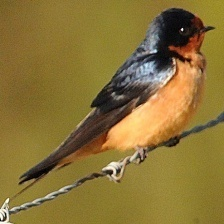

Label:  BARN SWALLOW


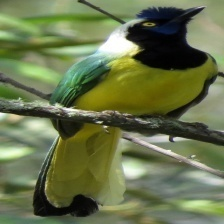

Label:  GREEN JAY


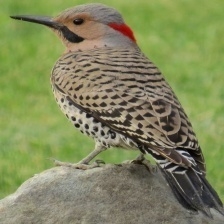

Label:  NORTHERN FLICKER


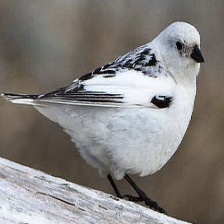

Label:  MCKAYS BUNTING


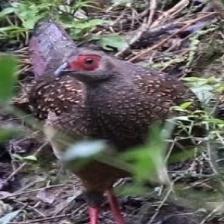

Label:  SWINHOES PHEASANT


In [3]:
from IPython.display import display
for x in ds['train'].shuffle(seed=231).select(range(5)):
  display(x["image"])
  print("Label: ", ds['train'].features['label'].int2str(x['label']))

In [ ]:
#Checking Label and Image for an American Wigeon
display(ds["train"][3924]["image"])
display(ds['train'].features["label"].int2str(ds['train'][3924]['label']))

In [4]:
#Displaying Features to see our classes
display(ds['train'].features)

{'image': Image(mode=None, decode=True),
 'label': ClassLabel(names=['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS

In [ ]:
# Checking for corrupted images by image link is None
bad_images = []

for i in range(len(ds['train'])):
  image = ds['train'][i]['image']
  if image is None:
    bad_images.append(i)

print(f"Total number of corrupt/null images: {len(bad_images)}")
print("First Bad Ones: ", bad_images[:25])

In [5]:
# Checking for bird images that are not the same size as the defaulted 224x224
size_unmatched = []
for i in range(len(ds['train'])):
  width, height = ds['train'][i]['image'].size
  if width != 224 or height != 224:
    size_unmatched.append(i)
print(f"Amount of images not 224x224:{len(size_unmatched)}")
print(size_unmatched[:20])

Amount of images not 224x224:201
[52690, 61985, 61986, 61987, 61988, 61989, 61990, 61991, 61992, 61993, 61994, 61995, 61996, 61997, 61998, 61999, 62000, 62001, 62002, 62003]


In [ ]:
# Understanding size differences by checking a few of the images not our default size
for idx in size_unmatched[:10]:
  display(ds['train'][idx]['image'])

In [6]:
# Resizing Images using Hugging Face Map and PILLOW Resampling
def resize_image(examples):
  image = examples["image"]
  if image.size != (224,224):
    image = image.resize((224,224), Image.Resampling.BILINEAR)
  examples["image"] = image
  return examples

ds = ds.map(resize_image)

size_unmatched = []
for i in range(len(ds['train'])):
  width, height = ds['train'][i]['image'].size
  if width != 224 or height != 224:
    size_unmatched.append(i)
print(f"Amount of images not 224x224:{len(size_unmatched)}")
print(size_unmatched[:20])

Map:   0%|          | 0/84635 [00:00<?, ? examples/s]

Map:   0%|          | 0/2625 [00:00<?, ? examples/s]

Map:   0%|          | 0/2625 [00:00<?, ? examples/s]

Amount of images not 224x224:0
[]


In [7]:
import torch
import torchvision.models as models
from torchvision.models import ResNet18_Weights
from PIL import Image

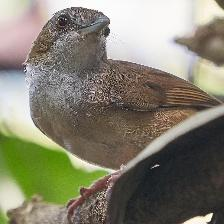

Image size (width, height): (224, 224)
Image format: JPEG
Image mode: RGB


In [8]:
first_image = ds['train'][0]['image']

display(first_image)

image_size = first_image.size
print(f"Image size (width, height): {image_size}")

image_format = first_image.format
print(f"Image format: {image_format}")

image_mode = first_image.mode
print(f"Image mode: {image_mode}")

In [9]:
weights = ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.fc = torch.nn.Identity()
model.eval()
transform = weights.transforms()

def get_embedding(img):
 x = transform(img).unsqueeze(0)
 with torch.no_grad():
    emb = model(x).squeeze().numpy()
 return emb

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 238MB/s]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image

image1 = ds['train'][0]['image']
image2 = ds['train'][3]['image']

print("Image 1:")
display(image1)
print("\nImage 2:")
display(image2)


img1 = get_embedding(image1)
img2 = get_embedding(image2)


img1 = img1.reshape(1, -1)
img2 = img2.reshape(1, -1)

similarity = cosine_similarity(img1, img2)[0][0]

print(f"\nSimilarity between the first two images: {similarity}")

if similarity > 0.90:
    print("duplicates")
else:
    print("not duplicates.")



In [12]:
#class imbalances
#making a dictionary of species names and how many pictures there are of each species to filter through later
#only done for training data since we are just training the model

#print(ds['train'].features) #dictionary of names from the label
from collections import Counter #counts how many there are of each label
values=ds["train"]["label"]
counts=Counter(values)
#print(counts) #how much there are of each value, key associated with a certain species
labels=ds["train"].features["label"].names #getting the species names
countsSpecies={labels[i]: c for i, c in counts.items()} #makes a dictionary of the species and how many images there are in alphabetical order
#print(countsSpecies)

In [13]:
#assigning weights to different classes, best for datasets with medium levels of imbalance (eg. here)
#using cross entropy to have the model weigh classes with less samples more
#undersampling is not preferred due to the risk of permanently removing important data from the dataset

#for PyTorch
import torch

classCounts=torch.tensor([counts[i] for i in range(len(labels))], dtype=torch.float) #creates a list of how many there are per species alphabetically

n=classCounts.sum() #formula for computing the class weights
c=len(classCounts)
classWeights=n/(c*classCounts)
#print(classWeights)

In [14]:
#defining the loss function with these weights to properly evaluate the accuracy after training
import torch.nn as nn
criterion=nn.CrossEntropyLoss(weight=classWeights)
#all of the above goes before creating the model and training it
#with this, running the loss function weighs mistakes more heavily on the species with less pictures than speices with more pictures

In [ ]:
# EfficientNet model training starts here
!pip install timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import timm
from tqdm import tqdm
import numpy as np
from torchvision import transforms

In [ ]:
# fix class weights (class 381 is empty)

from collections import Counter

labeles = ds['train'].features['label'].names
label_values = ds['train']['label']
counts = Counter(label_values)

classCounts = torch.tensor([counts.get(i,0) for i in range(len(labels))], dtype=torch.float)
print(f'original classcounts: {classCounts[381]}')

classCounts[classCounts == 0] = 1
print(f'fixed classcounts: {classCounts[381]}')

n = classCounts.sum()
c = len(labels)
classWeights = n / (c * classCounts)

print(f'Any infinite weights: {torch.isinf(classWeights).any()}')

In [ ]:
# filter out class 381 completely (has 0 training images, but has images in validation set)

print("Original dataset sizes:")
print(f"  Train: {len(ds['train'])}")
print(f"  Validation: {len(ds['validation'])}")
print(f"  Test: {len(ds['test'])}")

# Filter out class 381 from all splits
ds['train'] = ds['train'].filter(lambda x: x['label'] != 381)
ds['validation'] = ds['validation'].filter(lambda x: x['label'] != 381)
ds['test'] = ds['test'].filter(lambda x: x['label'] != 381)

print("\nAfter removing PARAKEET AUKLET (class 381):")
print(f"  Train: {len(ds['train'])} (-{84635 - len(ds['train'])} images)")
print(f"  Validation: {len(ds['validation'])} (-{2625 - len(ds['validation'])} images)")
print(f"  Test: {len(ds['test'])} (-{2625 - len(ds['test'])} images)")
print("\n✓ Class 381 removed from all splits")

In [ ]:
# convert dataset to pytorch format

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # use predefined imagenet values
        std=[0.229, 0.224, 0.225]
    )
])

# custom class
class BirdDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):
      self.dataset = hf_dataset
      self.transform = transform

    def __len__(self):
      return len(self.dataset)

    def __getitem__(self, idx):
      item = self.dataset[idx]
      image = item['image']
      label = item['label']
      if self.transform:
        image = self.transform(image)
      return image, label

train_dataset = BirdDataset(ds['train'], transform=transform)
val_dataset = BirdDataset(ds['validation'], transform=transform)
test_dataset = BirdDataset(ds['test'], transform=transform)

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

In [ ]:
# create dataloaders (help us batch process and randomize order)

BATCH_SIZE  = 32
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)
val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)
print(f"Number of training batches: {len(train_loader)}")

In [ ]:
# load model

model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=526)
device = torch.device('cuda')
model = model.to(device)
print(f"Using device: {device}")
print(f"Model loaded with {sum(p.numel() for p in model.parameters())} parameters")

In [ ]:
# set up training weights

classWeights = classWeights.to(device)
criterion = nn.CrossEntropyLoss(weight=classWeights)

optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2,
)

In [ ]:
# training definitions

def train_one_epoch(model, train_loader, criterion, optimizer, device):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for images, labels in tqdm(train_loader, desc="training"):
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

  epoch_loss = running_loss/len(train_loader)
  epoch_acc = 100. * correct / total
  return epoch_loss, epoch_acc

def validate(model, val_loader, criterion, device):
  model.eval()
  running_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
      for images, labels in tqdm(val_loader, desc="validation"):
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          running_loss += loss.item()
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += predicted.eq(labels).sum().item()

      epoch_loss = running_loss / len(val_loader)
      epoch_acc = 100. * correct / total
      return epoch_loss, epoch_acc



In [ ]:
# run training

NUM_EPOCHS = 10
best_val_acc = 0.0
print('Starting training: \n')
for epoch in range(NUM_EPOCHS):
  print(f"Epoch {epoch+1}/{NUM_EPOCHS}")

  train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
  print(f"Train loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")

  val_loss, val_acc = validate(model, val_loader, criterion, device)
  print(f"Val loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

  scheduler.step(val_loss)

  if val_acc > best_val_acc:
    best_val_acc = val_acc
    torch.save(model.state_dict(), 'best_efficientnet_b0_birds.pth')
    print(f"Training complete, best val accuracy: {best_val_acc:.2f}%")

In [ ]:
# analyze results

from collections import Counter
from tqdm import tqdm

def analyze_confusion(dataset, top_n=15):
    # find which species pairs get confused most often

    print("Analyzing errors on validation set...")
    model.eval()

    confusion_pairs = []

    with torch.no_grad():
        for idx in tqdm(range(len(dataset))):
            image, true_label = dataset[idx]
            image = image.unsqueeze(0).to(device)

            output = model(image)
            _, predicted = output.max(1)
            pred_label = predicted.item()

            # only track errors
            if pred_label != true_label:
                confusion_pairs.append((true_label, pred_label))

    # count most common confusions
    confusion_counts = Counter(confusion_pairs)
    top_confusions = confusion_counts.most_common(top_n)

    print(f"\n{'='*80}")
    print(f"TOP {top_n} MOST CONFUSED SPECIES PAIRS")
    print(f"{'='*80}\n")

    for i, ((true_idx, pred_idx), count) in enumerate(top_confusions, 1):
        true_name = labels[true_idx]
        pred_name = labels[pred_idx]
        print(f"{i}. {count} times: '{true_name}' → predicted as → '{pred_name}'")

    return top_confusions

top_errors = analyze_confusion(val_dataset, top_n=15)

In [ ]:
# visually show species that were confused

def show_top_confusions_comparison(dataset, top_errors, num_pairs=3):

    fig, axes = plt.subplots(num_pairs, 2, figsize=(12, 5*num_pairs))

    for pair_idx in range(num_pairs):
        true_idx, pred_idx = top_errors[pair_idx][0]
        count = top_errors[pair_idx][1]

        true_name = labels[true_idx]
        pred_name = labels[pred_idx]

        print(f"\n{'='*60}")
        print(f"CONFUSION #{pair_idx+1}: {count} times")
        print(f"TRUTH: {true_name}")
        print(f"MODEL PREDICTED: {pred_name}")
        print(f"{'='*60}")

        # find one example of this confusion
        found = False
        model.eval()
        with torch.no_grad():
            for idx in range(len(dataset)):
                image, label = dataset[idx]
                if label == true_idx:
                    image_batch = image.unsqueeze(0).to(device)
                    output = model(image_batch)
                    _, predicted = output.max(1)

                    if predicted.item() == pred_idx:
                        confused_image = dataset.dataset[idx]['image']
                        found = True
                        break

        if not found:
            print("No example found for this pair")
            continue

        # LEFT: Show what it actually is (with a correct example)
        ax_left = axes[pair_idx, 0] if num_pairs > 1 else axes[0]

        # find a correct example of the true species
        correct_example = None
        with torch.no_grad():
            for idx in range(len(dataset)):
                image, label = dataset[idx]
                if label == true_idx:
                    image_batch = image.unsqueeze(0).to(device)
                    output = model(image_batch)
                    _, predicted = output.max(1)

                    if predicted.item() == true_idx:
                        correct_example = dataset.dataset[idx]['image']
                        break

        if correct_example is not None:
            ax_left.imshow(correct_example)
        else:
            ax_left.imshow(confused_image)

        ax_left.axis('off')
        ax_left.set_title(f"✓ {true_name}\n(should've guessed)",
                         fontsize=12, color='green', weight='bold', pad=10)
        ax_left.spines['top'].set_color('green')
        ax_left.spines['bottom'].set_color('green')
        ax_left.spines['left'].set_color('green')
        ax_left.spines['right'].set_color('green')
        ax_left.spines['top'].set_linewidth(5)
        ax_left.spines['bottom'].set_linewidth(5)
        ax_left.spines['left'].set_linewidth(5)
        ax_left.spines['right'].set_linewidth(5)

        # RIGHT: Show what model wrongly thinks it is
        ax_right = axes[pair_idx, 1] if num_pairs > 1 else axes[1]
        ax_right.imshow(confused_image)
        ax_right.axis('off')
        ax_right.set_title(f"✗ MODEL SAYS: {pred_name}\n(wrong guess)",
                          fontsize=12, color='red', weight='bold', pad=10)
        ax_right.spines['top'].set_color('red')
        ax_right.spines['bottom'].set_color('red')
        ax_right.spines['left'].set_color('red')
        ax_right.spines['right'].set_color('red')
        ax_right.spines['top'].set_linewidth(5)
        ax_right.spines['bottom'].set_linewidth(5)
        ax_right.spines['left'].set_linewidth(5)
        ax_right.spines['right'].set_linewidth(5)

    plt.tight_layout()
    plt.savefig('top_3_confusions.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("\n saved as 'top_3_confusions.png'")

show_top_confusions_comparison(val_dataset, top_errors, num_pairs=3)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import timm

In [18]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #imagenet
])

In [19]:
class BaseModelImageDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image']
        label = item['label']
        if self.transform:
            image = self.transform(image)
        return image, label

In [21]:
train_dataset = BaseModelImageDataset(ds['train'], transform=transform)
val_dataset = BaseModelImageDataset(ds['validation'], transform=transform)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [23]:
num_classes = len(ds['train'].features['label'].names)
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [25]:
for epoch in range(10):
    print(f"\nEpoch {epoch + 1}")
    model.train()
    total, correct, loss_total = 0, 0, 0.0
    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = outputs.max(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        loss_total += loss.item()

    print(f"Train Loss: {loss_total / len(train_loader):.4f} | Train Acc: {100 * correct / total:.2f}%")

    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"Val Acc: {100 * correct / total:.2f}%")


Epoch 1


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 4.0073 | Train Acc: 20.50%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.12it/s]


Val Acc: 49.68%

Epoch 2


Training: 100%|██████████| 2645/2645 [11:03<00:00,  3.98it/s]


Train Loss: 1.7761 | Train Acc: 57.72%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.13it/s]


Val Acc: 72.99%

Epoch 3


Training: 100%|██████████| 2645/2645 [11:05<00:00,  3.98it/s]


Train Loss: 1.1340 | Train Acc: 71.96%


Validation: 100%|██████████| 83/83 [00:08<00:00,  9.22it/s]


Val Acc: 77.49%

Epoch 4


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 0.8226 | Train Acc: 78.76%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.19it/s]


Val Acc: 79.47%

Epoch 5


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 1.6235 | Train Acc: 65.81%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.11it/s]


Val Acc: 78.90%

Epoch 6


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 0.6216 | Train Acc: 83.35%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.08it/s]


Val Acc: 81.30%

Epoch 7


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 0.4680 | Train Acc: 86.88%


Validation: 100%|██████████| 83/83 [00:08<00:00,  9.32it/s]


Val Acc: 82.59%

Epoch 8


Training: 100%|██████████| 2645/2645 [11:03<00:00,  3.98it/s]


Train Loss: 0.3772 | Train Acc: 88.99%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.21it/s]


Val Acc: 82.40%

Epoch 9


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 0.2935 | Train Acc: 91.27%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.13it/s]


Val Acc: 82.44%

Epoch 10


Training: 100%|██████████| 2645/2645 [11:04<00:00,  3.98it/s]


Train Loss: 0.2448 | Train Acc: 92.59%


Validation: 100%|██████████| 83/83 [00:09<00:00,  9.13it/s]

Val Acc: 82.97%
